In [115]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import spacy
nlp = spacy.load('en_core_web_sm')


In [116]:
df_sample = pd.read_csv('EN_BJ_sample.csv')


In [839]:
len(df_sample)

1638

In [2380]:
def show_info(i):
    print(df_sample.iloc[i]['column_1'])
    print(df_sample.iloc[i]['title'])
    print(df_sample.iloc[i]['top nouns'])
    print(df_sample.iloc[i]['top words'])
#i = 1310
show_info(i)

Lifestyle
Learning to connect
['culture', 'interest', 'child', 'city', 'heritage', 'services', 'tidiness', 'student', 'dreams', 'graduate', 'program', 'quality', 'education', 'opportunity', 'access', 'experts', 'teachers', 'internship', 'company', 'year']
['Chinese', 'University', 'culture', 'Beijing', 'study', 'Peking', 'apply', "Jun'ao", 'real', 'Antonio', 'Mexico', 'strong', 'interest', 'child', 'enrolled', 'Language', 'Culture', '2011', 'impressed', 'city']


In [2459]:
#df_sample.at[i,'overall label']= 'business'
#df_sample.at[i,'overall label']= 'life style'
#df_sample.at[i,'overall label']= 'tech'
df_sample.at[i,'overall label']= 'politics'
#df_sample.at[i,'overall label']= 'education'


df_sample.at[i, 'business'] = 0
df_sample.at[i,'life style'] = 1
df_sample.at[i,'tech'] = 0
df_sample.at[i,'politics'] = 1
df_sample.at[i,'education'] = 0
i += 1
show_info(i)
print(i)


Business
Beijing subway: Man behind the scenes
['job', 'construction', 'workers', 'company', 'work', 'project', 'people', 'subway', 'years', 'position', 'day', 'time', 'manager', 'lot', 'age', 'worker', 'city', 'head', 'metro', 'service']
['Ning', 'said', 'job', 'construction', 'working', 'workers', ' ', 'company', 'work', 'underground', 'Beijing', 'project', 'people', 'subway', 'long', 'years', 'hard', 'position', 'day', 'building']
1336


In [2460]:
df_sample.iloc[i]

Unnamed: 0                                                     134
column_1                                                  Business
column_2                                                Biz Photos
content          A 48-year-old construction worker, who goes by...
publishtime                                       2017-04-25 07:32
source                              ZHU LINGQING,CHINADAILY.COM.CN
title                        Beijing subway: Man behind the scenes
url              http://www.chinadaily.com.cn/a/201704/25/WS59b...
if_business                                                      1
if_BJ                                                         True
top nouns        ['job', 'construction', 'workers', 'company', ...
top words        ['Ning', 'said', 'job', 'construction', 'worki...
overall label                                             business
business                                                         1
life style                                                    

In [2436]:
df_sample.iloc[i-1]

Unnamed: 0                                                   15756
column_1                                                     China
column_2                                                   Society
content          In nine hours and at a fare of about 1,000 yua...
publishtime                                       2018-08-10 10:25
source                                                     ECNS.CN
title            Bullet train to link Beijing and Hong Kong in ...
url              http://www.chinadaily.com.cn/a/201808/10/WS5b6...
if_business                                                      0
if_BJ                                                         True
top nouns        ['hours', 'train', 'mainland', 'passengers', '...
top words        ['Hong', 'Kong', 'hours', 'Guangzhou', 'train'...
overall label                                           life style
business                                                         1
life style                                                    

In [2437]:
df_sample['overall label'].value_counts()

life style    456
politics      390
business      380
education     178
tech          151
0              83
Name: overall label, dtype: int64

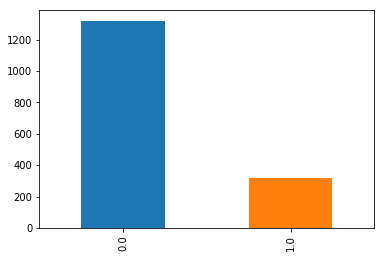

In [2438]:
df_sample['tech'].value_counts().plot.bar()

In [2439]:
df_sample['life style'].value_counts()

1.0    961
0.0    677
Name: life style, dtype: int64

In [2440]:
df_sample['life style'].value_counts()

1.0    961
0.0    677
Name: life style, dtype: int64

In [2441]:
df_sample.iloc[i]

Unnamed: 0                                                    1224
column_1                                                  Business
column_2                                                 Companies
content          Edinburgh-based Pickering’s Gin is tapping int...
publishtime                                       2018-06-15 00:05
source                        BO LEUNG IN LONDON,CHINADAILY.COM.CN
title            Beijing residents set to raise a glass to Scot...
url              http://www.chinadaily.com.cn/a/201806/15/WS5b2...
if_business                                                      1
if_BJ                                                         True
top nouns        ['gin', 'bar', 'beer', 'seafood', 'company', '...
top words        ['’s', 'China', 'gin', 'Pickering', 'bar', 'Sc...
overall label                                                    0
business                                                         0
life style                                                    

In [2330]:
def haveeducation(lst):
    if 'school' in lst.lower() or 'class' in lst.lower() or 'study' in lst.lower() or 'teach' in lst.lower():
        return True
    else:
        return False

def havetech(lst):
    if 'ai' in lst.lower() or 'tech' in lst.lower() or 'data' in lst.lower() or 'internet' in lst.lower():
        return True
    else:
        return False

In [2331]:
df_sample['top words'].apply(havetech)[:i].value_counts()

True     987
False    298
Name: top words, dtype: int64

In [2332]:
len(df_sample)

1638

In [2468]:
df_sample = df_sample[df_sample['overall label'] != '0']

In [2469]:
df_sample['overall label'].value_counts()

life style    458
politics      392
business      382
education     178
tech          154
Name: overall label, dtype: int64

In [2470]:
df_sample.to_csv('EN_BJ_sample.csv',index = False)